**Data Preparation**

In [164]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv('/content/drive/MyDrive/MSBA_Colab_2020/ML_Algorithms/cvd_data.csv')

In [166]:
df.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [168]:
y=df.cvd_4types

In [169]:
x = df.drop(['cvd_4types'], axis = 1)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

**Part I: Building Logistic Regression Model**


In [171]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

In [172]:
logreg.score(x_test, y_test)

0.6813977389516958

**Part II: Feature Importance**

In [173]:
logreg.fit(x/np.std(x, 0),y)
print(logreg.coef_)

[[ 8.64820225e-03 -3.71269912e-01  1.82465488e-01 -1.36923697e-01
  -6.03012304e-01 -1.82365013e-01  1.12601193e+00 -2.32713332e-01
   6.20267993e-04 -6.65335449e-02  7.26313709e-02  1.59280281e-01
   8.82116906e-02 -8.32413282e-02  1.17473321e-01 -3.62173664e-01]]


In [174]:
x.columns

Index(['age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20', 'waist',
       'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab', 'bend25',
       'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

In [175]:
from sklearn.feature_selection import RFE
data_x = x_train
data_select = RFE(logreg, n_features_to_select= 1)
data_select = data_select.fit(data_x, y_train)

In [176]:
order = data_select.ranking_
order

array([15,  1,  5,  6, 11,  9, 10, 13, 16, 12,  4,  2,  8, 14,  7,  3])

In [177]:
feature_ranks = pd.DataFrame(order,index=x.columns)
feature_ranks.rename(columns= {0:'Rank'}, inplace=True)

In [178]:
feature_ranks.sort_values(by='Rank', inplace= True)

In [179]:
feature_ranks

,Rank
race,1
parrptdiab,2
hlthlm25,3
srhype,4
educat,5
mstat,6
tired25,7
bend25,8
neck20,9
waist,10


**Part III: Evaluation**

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.6447792757071107

Text(0.5, 1.0, 'ROC curve')

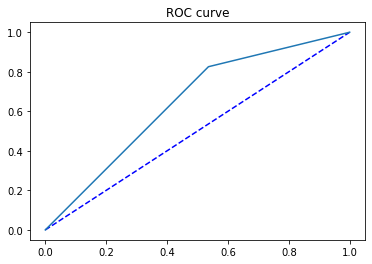

In [181]:
plt.plot([0, 1], [0, 1],'b--')
plt.plot(fpr, tpr)
plt.title('ROC curve')

**V. Conclusion**
 -     The Logistic Regression model provides the score of 68%, and this is acceptable to predict CVD Risk. The AUC score is 0.64, so we can expect there would be many errors in our predictions. The ROC curve reflects the area that the model will have wrong predictions. From the coefficients, race, mstat, hip, neck20, av_weight_kg, tea15, happy25, and hlthlm25 have negative coefficients. When these variables go up, the CVD risk will go down. Therefore, the patient who has high numbers of these variables will tend not to have CVD risk. On the other hand, when the rest of independent variables go up, the CVD risk will go up. Furthermore, the coefficients reflect how much the features impact the CVD risk. The rank indicates the most impactful feature to the least effective feature.  
